In [197]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 100

In [198]:
def showImage(img, colorbar=False):
	plt.figure(figsize=(10, 10))
	if len(img.shape) == 2:
		showed = plt.imshow(img, cmap='gray')
	else:
		showed = plt.imshow(img)
	if colorbar:
		plt.colorbar(showed, shrink=0.5, label='depth')
	plt.axis('off')
	plt.tight_layout()

In [199]:
def createPattern(shape=(16, 16), levels=64):
	return np.random.randint(0, levels - 1, shape) / levels

In [200]:
pattern = createPattern(shape=(100, 100), levels=2000)

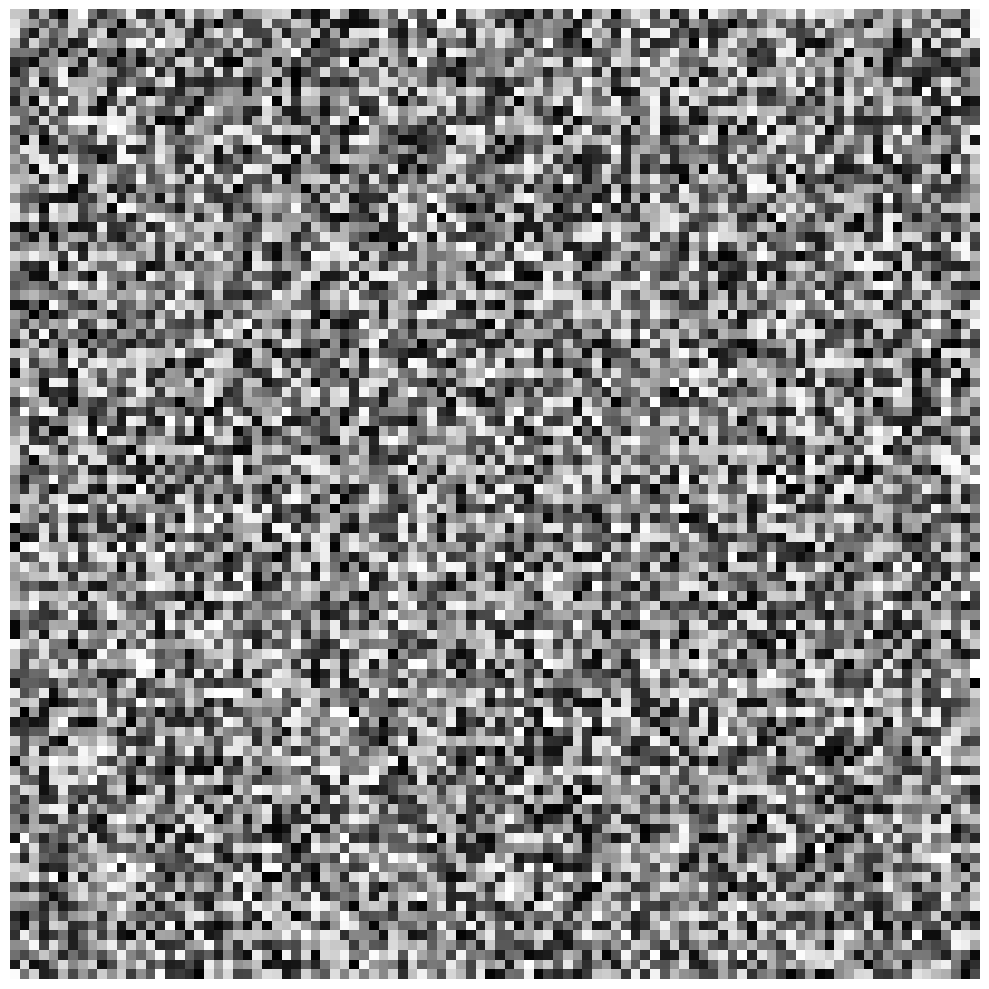

In [201]:
showImage(pattern)

In [202]:
def makeCircularDepthmap(shape=(600, 800), center=None, radius=100):
	"""Creates a circular depthmap, centered on the image."""
	depthmap = np.zeros(shape, dtype=np.float64)
	r = np.arange(depthmap.shape[0])
	c = np.arange(depthmap.shape[1])
	R, C = np.meshgrid(r, c, indexing='ij')
	if center is None:
		center = np.array([r.max() / 2, c.max() / 2])
	d = np.sqrt((R - center[0]) ** 2 + (C - center[1]) ** 2)
	depthmap += (d < radius)
	return depthmap

In [203]:
depthmap = makeCircularDepthmap(radius=150)

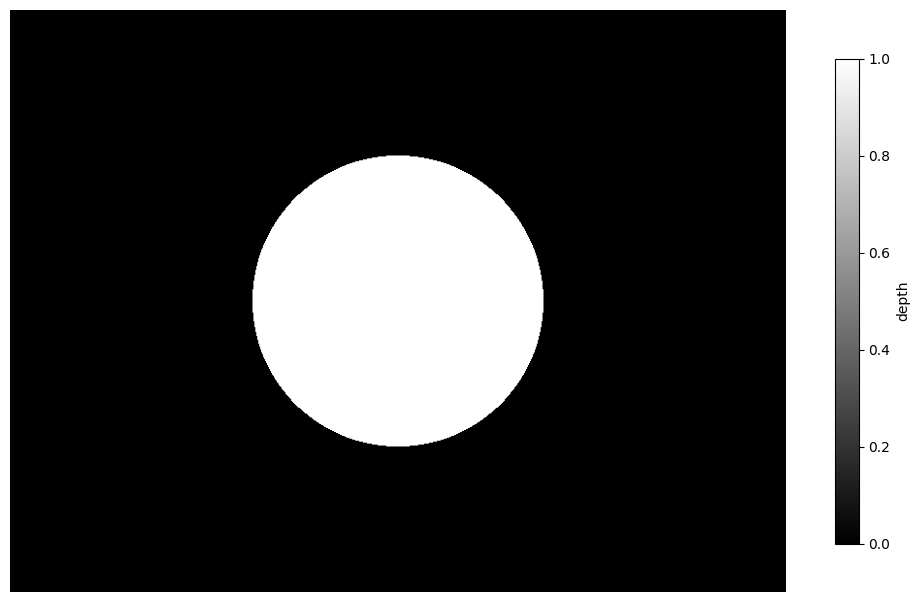

In [204]:
showImage(depthmap, colorbar=True)

In [205]:
def normalize(depthmap):
	"""Normalizes values of depthmap to [0, 1] range."""
	if depthmap.max() > depthmap.min():
		return (depthmap - depthmap.min()) / (depthmap.max() - depthmap.min())
	else:
		return depthmap

In [206]:
def Autostereogram(depthmap, pattern, shift_amplitude=0.1, invert=False):
	"""Creates an autostereogram from depthmap and pattern."""
	depthmap = normalize(depthmap)
	if invert:
		depthmap = 1 - depthmap
	autostereogram = np.zeros_like(depthmap, dtype=pattern.dtype)
	for r in np.arange(autostereogram.shape[0]):
		for c in np.arange(autostereogram.shape[1]):
			if c < pattern.shape[1]:
				autostereogram[r, c] = pattern[r % pattern.shape[0], c]
			else:
				shift = int(depthmap[r, c] * shift_amplitude * pattern.shape[1])
				autostereogram[r, c] = autostereogram[r, c - pattern.shape[1] + shift]
	return autostereogram

In [207]:
autostereogram = Autostereogram(depthmap, pattern)

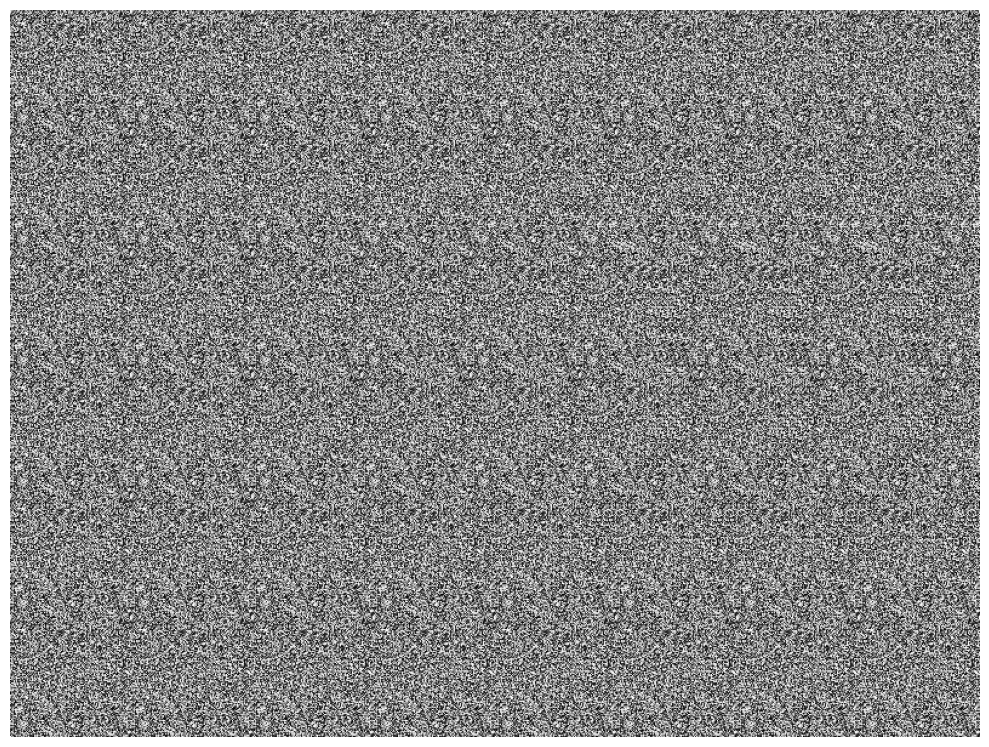

In [208]:
showImage(autostereogram)

In [209]:
autostereogram = Autostereogram(depthmap, pattern, invert=True)

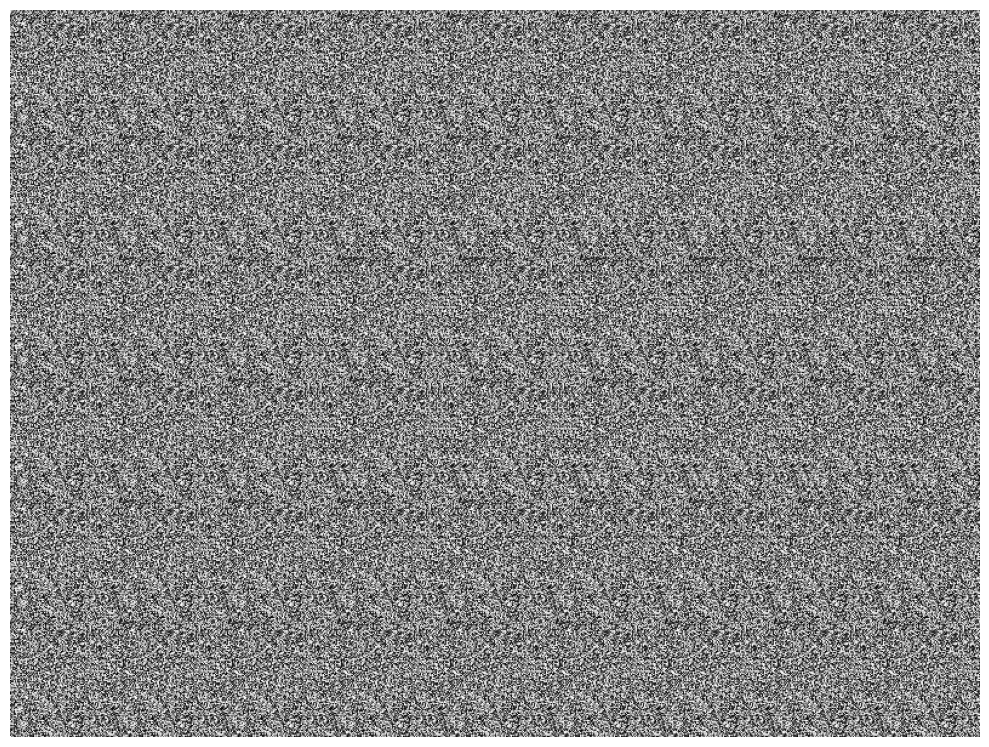

In [210]:
showImage(autostereogram)

In [211]:
depthmap = makeCircularDepthmap(center=(200, 300), radius=100) + makeCircularDepthmap(center=(450, 500), radius=130) + makeCircularDepthmap(center=(250, 150), radius=150)
depthmap = normalize(depthmap)

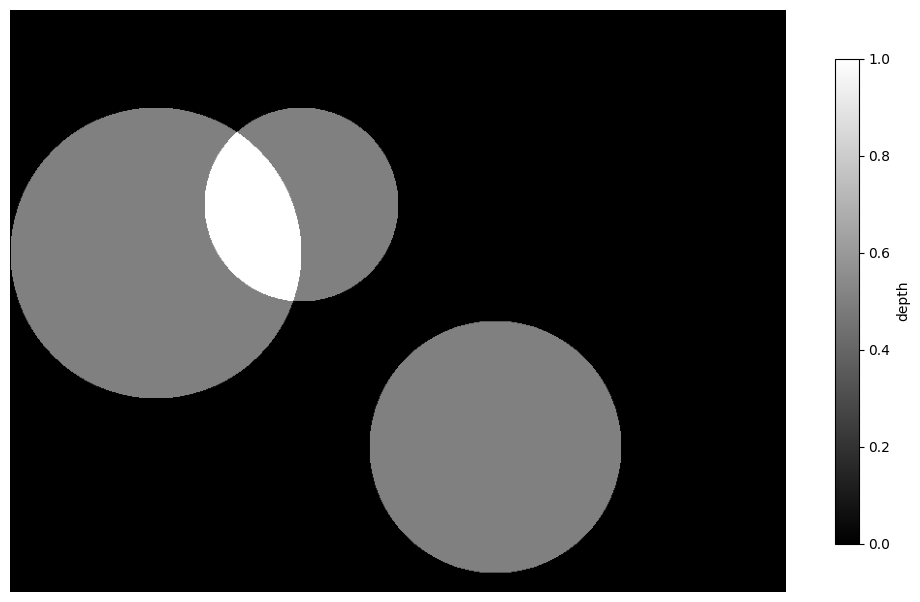

In [212]:
showImage(depthmap, colorbar=True)

In [213]:
autostereogram = Autostereogram(depthmap, pattern)

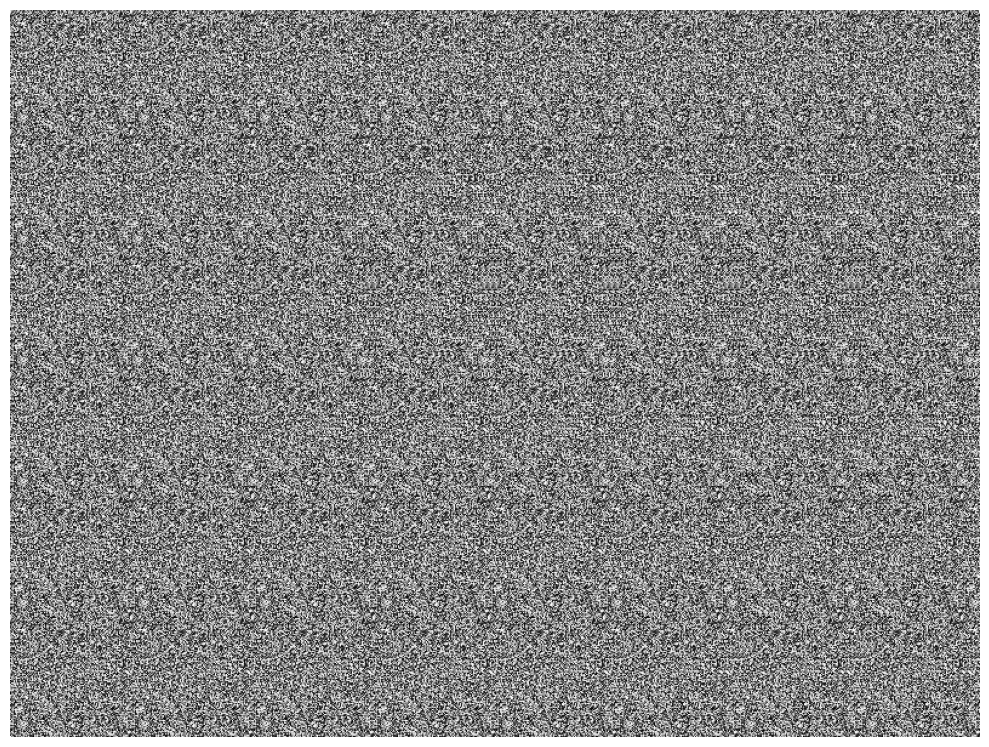

In [214]:
showImage(autostereogram)